In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.shape

(768, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
data.isnull().sum() #checking if data having null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
data.duplicated().sum()

0

In [21]:
num_duplicates=data.duplicated().sum()

In [23]:
if num_duplicates>0:
    print("the data contains duplicate values ")
    data=data.drop_duplicates
    print("number of duplicate values after droping",num_duplicates)
else:
    print("the data dosnot contains any duplicates")

the data dosnot contains any duplicates


In [24]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


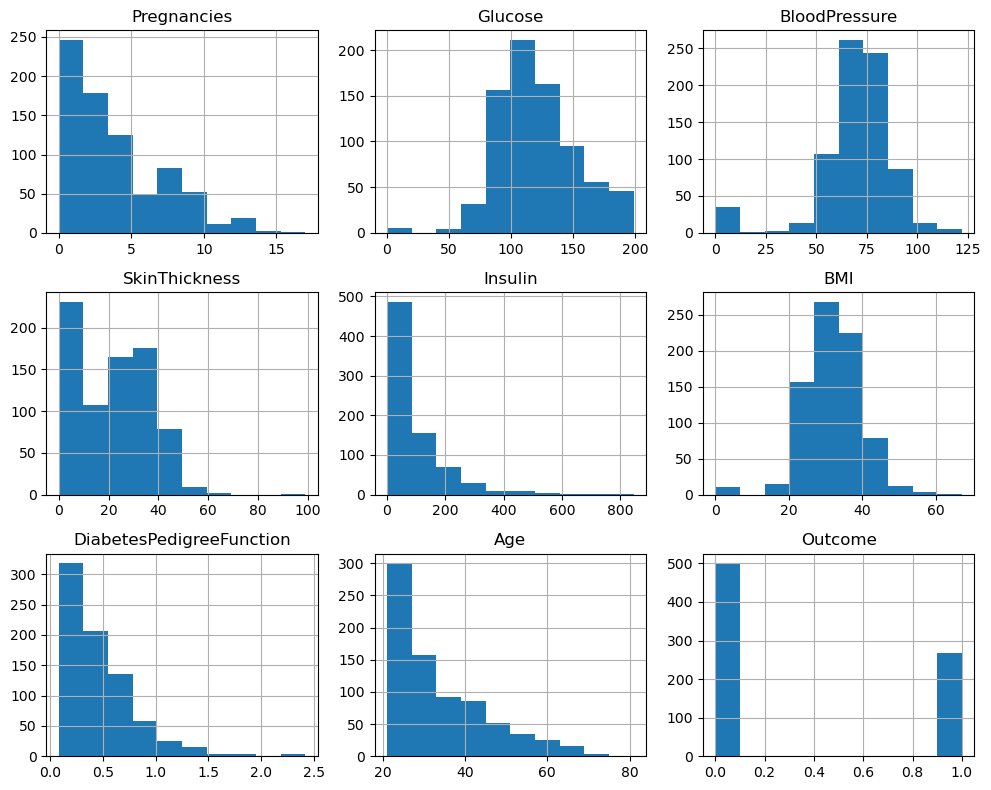

In [31]:
data.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

In [32]:
X=data.iloc[:,:-1]
X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [34]:
Y=data.iloc[:,-1]
Y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [35]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.30, random_state=51)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


Train the model

In [38]:
logistic=LogisticRegression()
logistic.fit(X_train,Y_train)

LogisticRegression()

Evaluate the Model

In [39]:
Y_predict=logistic.predict(X_test)
print("Y_predict\n",Y_predict)

Y_predict
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0
 0 0 0 0 1 0 1 0 0]


In [40]:
print("Y_test\n",Y_test)

Y_test
 737    0
505    0
296    1
711    0
329    0
      ..
405    0
315    0
131    1
364    0
322    1
Name: Outcome, Length: 231, dtype: int64


In [43]:
score=accuracy_score(Y_test,Y_predict)
print("Accuracy_score:" ,score*100)

Accuracy_score: 79.22077922077922


In [48]:
import numpy as np

Visually understand the performance of the model

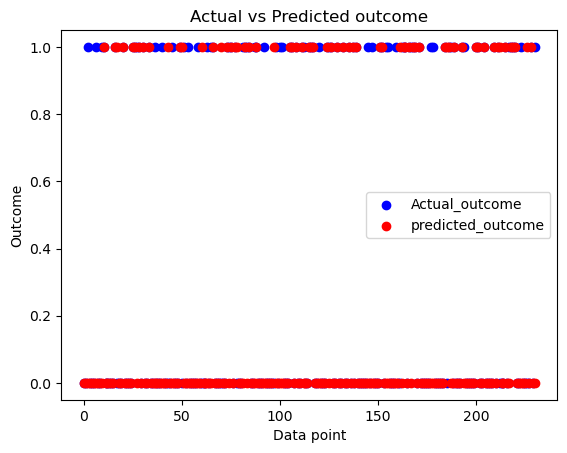

In [58]:
fig, ax=plt.subplots()
ax.scatter(range(len(Y_test)),Y_test, color="blue", label="Actual_outcome")
ax.scatter(range(len(Y_predict)), Y_predict, color="red", label="predicted_outcome")
ax.set_xlabel("Data point")
ax.set_ylabel("Outcome")
ax.set_title("Actual vs Predicted outcome")

ax.legend()
plt.show()



# Use the model
once the model is trained and evaluted you can use to predict unseen dataset.

In [59]:
data.to_html("sfsg")